In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt 

# Read Noise2Seg Results

In [2]:
def get_measure(name, exp, run=1, fraction=0.5, measure='AP', score_type='validation_'):
    with open('/Users/prakash/Desktop/Noise2Seg_cluster/experiments/{}_{}_run{}/fraction_{}/{}scores.csv'.format(name, exp, run, fraction, score_type)) as f:
        line = f.readline()
        while line:
            line = line.strip().split(',')
            if line[0] == measure:
                return float(line[1])
            line = f.readline()
    return None

In [3]:
def read_Noise2Seg_results(name, exp, measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type=''):
    
    stats = []
    
    for frac in fractions:
        scores = []
        for r in runs:
            scores.append(get_measure(name, exp, run=r, fraction=frac, measure=measure, score_type=score_type))
        
        scores = np.array(scores)
        stats.append([frac, np.mean(scores), np.std(scores)/np.sqrt(scores.shape[0])])
    
    return np.array(stats)

# Read VoidSeg Results

In [4]:
def read_voidseg_results(name):
    content = []
    with open('/Users/prakash/Desktop/fileserver_Noise2Seg/VoidSeg_Baselines/machine_readable/' + name) as f:
        line = f.readline()
        while line:
            content.append([float(x) for x in line.strip().split(" ")])
            line = f.readline()

    return np.array(content)

# Fraction to #Images

In [5]:
def fraction_to_abs(fracs, max_num_imgs=3800):
    return np.round(max_num_imgs*fracs/100)

In [6]:
fraction_to_abs(4)

152.0

In [7]:
DSB_n10_AP_baseline = read_voidseg_results('DSB_n10_AP_baseline.txt')
DSB_n10_AP_sequential = read_voidseg_results('DSB_n10_AP_sequential.txt')
DSB_n10_AP_finetune = read_voidseg_results('DSB_n10_AP_finetune.txt')
DSB_n10_AP_finetuneSequential = read_voidseg_results('DSB_n10_AP_finetune-sequential.txt')

DSB_n10_SEG_baseline = read_voidseg_results('DSB_n10_SEG_baseline.txt')
DSB_n10_SEG_sequential = read_voidseg_results('DSB_n10_SEG_sequential.txt')
DSB_n10_SEG_finetune = read_voidseg_results('DSB_n10_SEG_finetune.txt')
DSB_n10_SEG_finetuneSequential = read_voidseg_results('DSB_n10_SEG_finetune-sequential.txt')

DSB_n10_SEGoptAP_baseline = read_voidseg_results('DSB_n10_SEGoptAP_baseline.txt')
DSB_n10_SEGoptAP_sequential = read_voidseg_results('DSB_n10_SEGoptAP_sequential.txt')
DSB_n10_SEGoptAP_finetune = read_voidseg_results('DSB_n10_SEGoptAP_finetune.txt')
DSB_n10_SEGoptAP_finetuneSequential = read_voidseg_results('DSB_n10_SEGoptAP_finetune-sequential.txt')

In [8]:
DSB_n20_AP_baseline = read_voidseg_results('DSB_n20_AP_baseline.txt')
DSB_n20_AP_sequential = read_voidseg_results('DSB_n20_AP_sequential.txt')
DSB_n20_AP_finetune = read_voidseg_results('DSB_n20_AP_finetune.txt')
DSB_n20_AP_finetuneSequential = read_voidseg_results('DSB_n20_AP_finetune-sequential.txt')

DSB_n20_SEG_baseline = read_voidseg_results('DSB_n20_SEG_baseline.txt')
DSB_n20_SEG_sequential = read_voidseg_results('DSB_n20_SEG_sequential.txt')
DSB_n20_SEG_finetune = read_voidseg_results('DSB_n20_SEG_finetune.txt')
DSB_n20_SEG_finetuneSequential = read_voidseg_results('DSB_n20_SEG_finetune-sequential.txt')

DSB_n20_SEGoptAP_baseline = read_voidseg_results('DSB_n20_SEGoptAP_baseline.txt')
DSB_n20_SEGoptAP_sequential = read_voidseg_results('DSB_n20_SEGoptAP_sequential.txt')
DSB_n20_SEGoptAP_finetune = read_voidseg_results('DSB_n20_SEGoptAP_finetune.txt')
DSB_n20_SEGoptAP_finetuneSequential = read_voidseg_results('DSB_n20_SEGoptAP_finetune-sequential.txt')

In [9]:
DSB_n40_AP_baseline = read_voidseg_results('DSB_n40_AP_baseline.txt')
DSB_n40_AP_sequential = read_voidseg_results('DSB_n40_AP_sequential.txt')
DSB_n40_AP_finetune = read_voidseg_results('DSB_n40_AP_finetune.txt')
DSB_n40_AP_finetuneSequential = read_voidseg_results('DSB_n40_AP_finetune-sequential.txt')

DSB_n40_SEG_baseline = read_voidseg_results('DSB_n40_SEG_baseline.txt')
DSB_n40_SEG_sequential = read_voidseg_results('DSB_n40_SEG_sequential.txt')
DSB_n40_SEG_finetune = read_voidseg_results('DSB_n40_SEG_finetune.txt')
DSB_n40_SEG_finetuneSequential = read_voidseg_results('DSB_n40_SEG_finetune-sequential.txt')

DSB_n40_SEGoptAP_baseline = read_voidseg_results('DSB_n40_SEGoptAP_baseline.txt')
DSB_n40_SEGoptAP_sequential = read_voidseg_results('DSB_n40_SEGoptAP_sequential.txt')
DSB_n40_SEGoptAP_finetune = read_voidseg_results('DSB_n40_SEGoptAP_finetune.txt')
DSB_n40_SEGoptAP_finetuneSequential = read_voidseg_results('DSB_n40_SEGoptAP_finetune-sequential.txt')

# DSB2018 n0: AP

In [10]:
baseline_dsb_n0 = read_Noise2Seg_results('fin', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [11]:
sequential_dsb_n0 = read_Noise2Seg_results('finSeq', 'dsb_n0', measure='AP',runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [12]:
joint_dsb_n0 = read_Noise2Seg_results('noEarlyStop_w_1_1', 'DSB_n0', measure='AP',runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

# DSB2018 n10: AP

In [13]:
baseline_dsb_n10 = read_Noise2Seg_results('fin', 'dsb_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [14]:
sequential_dsb_n10 = read_Noise2Seg_results('finSeq', 'dsb_n10', measure='AP',runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [15]:
joint_dsb_n10 = read_Noise2Seg_results('noEarlyStop_w_1_1', 'DSB_n10', measure='AP',runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

# DSB2018 n20: AP

In [16]:
baseline_dsb_n20 = read_Noise2Seg_results('fin', 'dsb_n20', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [17]:
sequential_dsb_n20 = read_Noise2Seg_results('finSeq', 'dsb_n20', measure='AP',runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [18]:
joint_dsb_n20 = read_Noise2Seg_results('noEarlyStop_w_1_1', 'DSB_n20', measure='AP',runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

# DSB2018 n40: AP

In [19]:
baseline_dsb_n40 = read_Noise2Seg_results('fin', 'dsb_n40', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [21]:
sequential_dsb_n40 = read_Noise2Seg_results('finSeq', 'dsb_n40', measure='AP',runs=[1,2,3,4], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [22]:
joint_dsb_n40 = read_Noise2Seg_results('noEarlyStop_w_1_1', 'DSB_n40', measure='AP',runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

# Plot scores

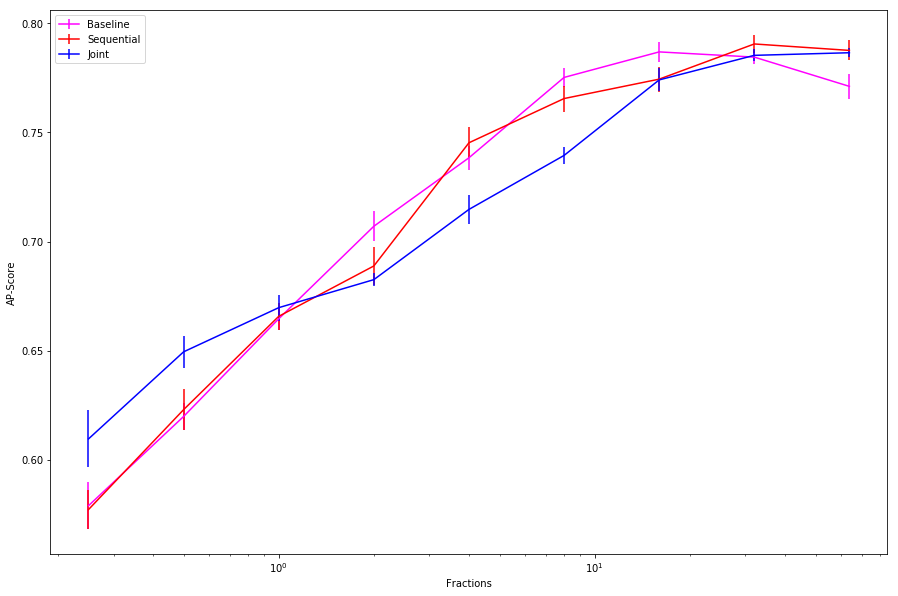

In [26]:
fig = plt.figure(figsize=(15,10))

plt.errorbar(baseline_dsb_n0[:-1, 0], 
             y = baseline_dsb_n0[:-1, 1], 
             yerr = baseline_dsb_n0[:-1, 2], 
            label='Baseline', color='magenta')

plt.errorbar(sequential_dsb_n0[:-1, 0], 
             y = sequential_dsb_n0[:-1, 1], 
             yerr = sequential_dsb_n0[:-1, 2], 
            label='Sequential', color='red')

plt.errorbar(joint_dsb_n0[:-1, 0], 
             y = joint_dsb_n0[:-1, 1], 
             yerr = joint_dsb_n0[:-1, 2], 
            label='Joint', color='blue')
plt.semilogx()

plt.xlabel('Fractions')
plt.ylabel('AP-Score')
plt.legend()
plt.show()

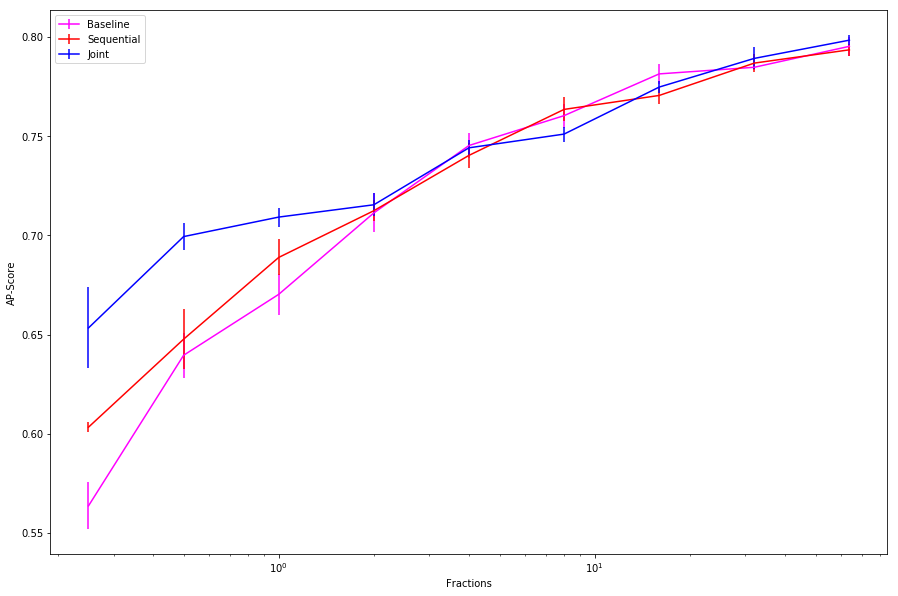

In [27]:
fig = plt.figure(figsize=(15,10))

plt.errorbar(baseline_dsb_n10[:-1, 0], 
             y = baseline_dsb_n10[:-1, 1], 
             yerr = baseline_dsb_n10[:-1, 2], 
            label='Baseline', color='magenta')

plt.errorbar(sequential_dsb_n10[:-1, 0], 
             y = sequential_dsb_n10[:-1, 1], 
             yerr = sequential_dsb_n10[:-1, 2], 
            label='Sequential', color='red')

plt.errorbar(joint_dsb_n10[:-1, 0], 
             y = joint_dsb_n10[:-1, 1], 
             yerr = joint_dsb_n10[:-1, 2], 
            label='Joint', color='blue')
plt.semilogx()

plt.xlabel('Fractions')
plt.ylabel('AP-Score')
plt.legend()
plt.show()

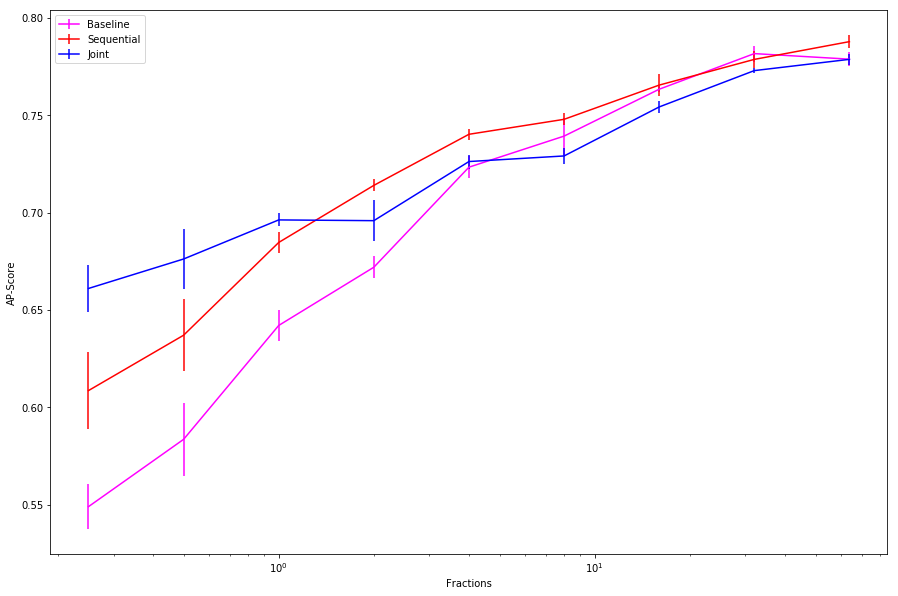

In [28]:
fig = plt.figure(figsize=(15,10))

plt.errorbar(baseline_dsb_n20[:-1, 0], 
             y = baseline_dsb_n20[:-1, 1], 
             yerr = baseline_dsb_n20[:-1, 2], 
            label='Baseline', color='magenta')

plt.errorbar(sequential_dsb_n20[:-1, 0], 
             y = sequential_dsb_n20[:-1, 1], 
             yerr = sequential_dsb_n20[:-1, 2], 
            label='Sequential', color='red')

plt.errorbar(joint_dsb_n20[:-1, 0], 
             y = joint_dsb_n20[:-1, 1], 
             yerr = joint_dsb_n20[:-1, 2], 
            label='Joint', color='blue')
plt.semilogx()

plt.xlabel('Fractions')
plt.ylabel('AP-Score')
plt.legend()
plt.show()

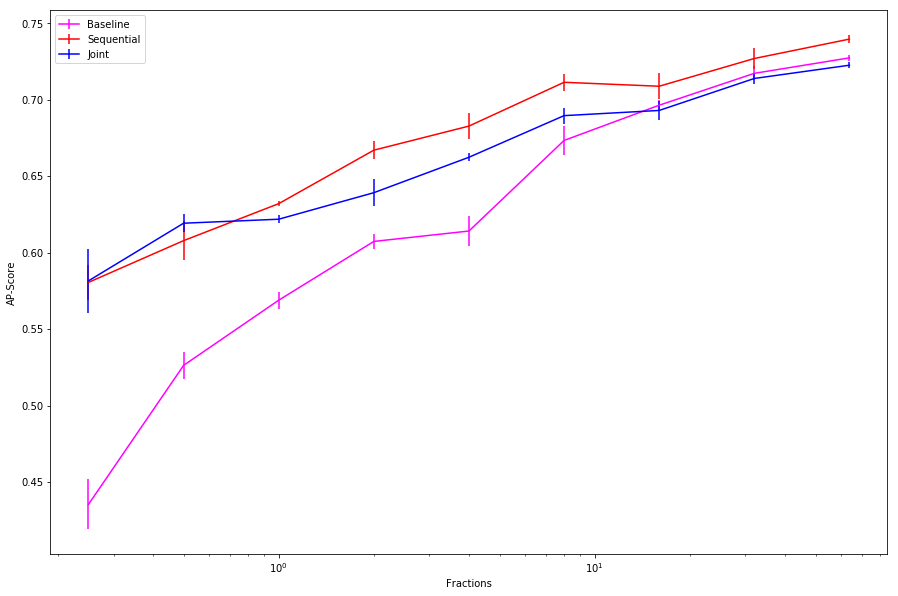

In [32]:
fig = plt.figure(figsize=(15,10))

plt.errorbar(baseline_dsb_n40[:-1, 0], 
             y = baseline_dsb_n40[:-1, 1], 
             yerr = baseline_dsb_n40[:-1, 2], 
            label='Baseline', color='magenta')

plt.errorbar(sequential_dsb_n40[:-1, 0], 
             y = sequential_dsb_n40[:-1, 1], 
             yerr = sequential_dsb_n40[:-1, 2], 
            label='Sequential', color='red')

plt.errorbar(joint_dsb_n40[:-1, 0], 
             y = joint_dsb_n40[:-1, 1], 
             yerr = joint_dsb_n40[:-1, 2], 
            label='Joint', color='blue')
plt.semilogx()

plt.xlabel('Fractions')
plt.ylabel('AP-Score')
plt.legend()
plt.show()